# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import datetime, timedelta

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_btc_data = requests.get(btc_url)
btc_data = response_btc_data.json()

# Use json.dumps with argument indent=4 to format data
print(json.dumps(btc_data, indent=4))

print(btc_data["data"]["1"]["quotes"]["USD"]["price"])

# Fetch current ETH price
response_eth_data = requests.get(eth_url)

eth_data = response_eth_data.json()
print(json.dumps(eth_data, indent=4))

print(eth_data["data"]["1027"]["quotes"]["USD"]["price"])

# Compute current value of my crpto
my_btc_value = my_btc * btc_data["data"]["1"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18989556,
            "total_supply": 18989556,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 41268.0,
                    "volume_24h": 18597251400,
                    "market_cap": 782873467708,
                    "percentage_change_1h": 0.755288639326098,
                    "percentage_change_24h": -1.56204430048463,
                    "percentage_change_7d": 9.02263481935163,
                    "percent_change_1h": 0.755288639326098,
                    "percent_change_24h": -1.56204430048463,
                    "percent_change_7d": 9.02263481935163
                },
                "CAD": {
                    "price": 51964.6656,
                    "volume_24h": 23417658962.88,
                    "ma

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_api_key)
type(alpaca_secret_key)

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

alpaca

In [8]:
# Format current date as ISO format
# end= pd.Timestamp.today(tz="America/Chicago").isoformat()
# start = datetime.now() + timedelta(days=-1000)
# start = pd.Timestamp(end,tz="America/Chicago").isoformat()
start = pd.Timestamp("2022-03-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2022-03-18", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day" 

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start,
    end
).df

# Preview DataFrame
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-01 05:00:00+00:00,110.600,111.1700,110.5700,110.82,14248500,39215,110.836369,AGG
2022-03-02 05:00:00+00:00,110.310,110.3800,109.4600,109.49,8489288,27605,109.930996,AGG
2022-03-03 05:00:00+00:00,109.785,110.0000,109.6500,109.86,15479351,47775,109.822045,AGG
2022-03-04 05:00:00+00:00,110.380,110.5500,110.2250,110.30,8116629,26863,110.381556,AGG
2022-03-07 05:00:00+00:00,109.850,110.1400,109.6400,109.66,12474681,35203,109.871205,AGG
2022-03-08 05:00:00+00:00,109.230,109.3301,109.1201,109.27,8639904,25293,109.234523,AGG
2022-03-09 05:00:00+00:00,109.090,109.2090,108.9300,109.04,9873754,29005,109.058720,AGG
2022-03-10 05:00:00+00:00,108.650,108.6800,108.2500,108.43,13646915,42329,108.417461,AGG
2022-03-11 05:00:00+00:00,108.440,108.5500,108.3400,108.41,10662625,29475,108.421874,AGG


In [9]:
# Pick AGG and SPY close prices
spy_bars = df_portfolio.loc[df_portfolio["symbol"] == "SPY"]
agg_bars = df_portfolio.loc[df_portfolio["symbol"] == "AGG"]

spy_close_price = spy_bars.tail(1).close.values
agg_close_price = agg_bars.tail(1).close.values

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $[108.1]
Current SPY closing price: $[444.52]


In [10]:
# Compute the current value of shares
my_spy_value = float(my_spy * spy_close_price)
my_agg_value = float(my_agg * agg_close_price)

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22226.00
The current value of your 200 AGG shares is $21620.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000
total_crypto_value = my_btc_value + my_eth_value
total_shares_value = my_spy_value + my_agg_value

# Consolidate financial assets data
assets_data = {
    "amount": [total_crypto_value, total_shares_value]
}

# Set the tickers
tickers = ["Crypto", "Shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(assets_data, index=tickers)

# Display savings DataFrame
display(df_savings)

,amount
Crypto,64846.921
Shares,43846.000


<AxesSubplot:title={'center':'Stocks Portfolio Composition'}, ylabel='amount'>

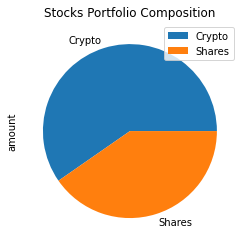

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
##print(emergency_fund)

# Calculate total amount of savings
total_savings = total_crypto_value + total_shares_value
##print(total_savings)

# Validate saving health
if (total_savings > emergency_fund):
    print("Congratulating the person for having enough money in this fund")
elif (total_savings == emergency_fund):
    print("congratulating the person on reaching this financial goal")
else: 
    deficit = emergency_fund - total_savings
    print(f"You are ${deficit} away the person is from reaching the goal")

36000
108692.921
Congratulating the person for having enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")